**<h2>Mask R-CNN</h2>**

**Imports**

In [1]:
import os
import sys
import random
import cv2
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

c:\Users\User\anaconda3\envs\summer_placement\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\User\anaconda3\envs\summer_placement\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\User\anaconda3\envs\summer_placement\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\User\anaconda3\envs\summer_placeme

**Config**

In [2]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

**Create Model**

In [3]:
import tensorflow as tf
import keras
import h5py
print(tf.__version__)
print(keras.__version__)
print(h5py.__version__)

1.5.0
2.2.5
2.10.0


In [4]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

**Class Names**

In [5]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

**Object Detection**

Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


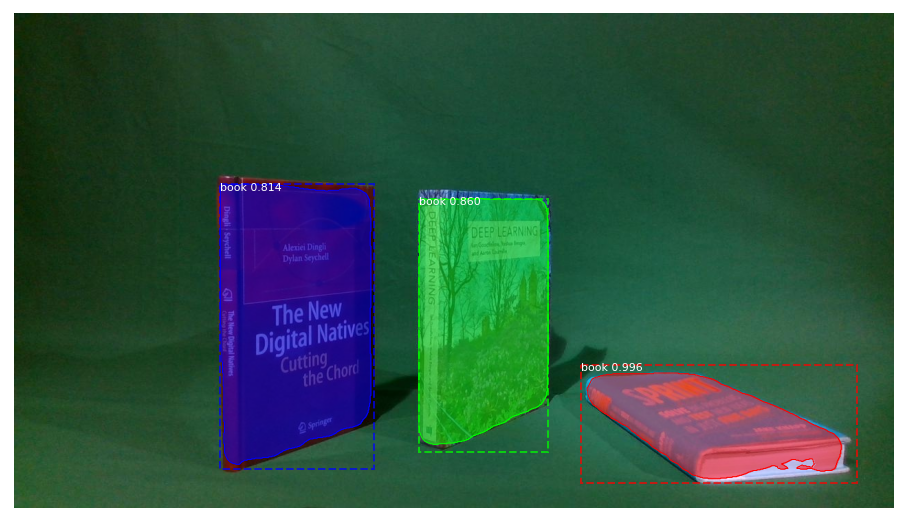

In [6]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

**Display Masks**

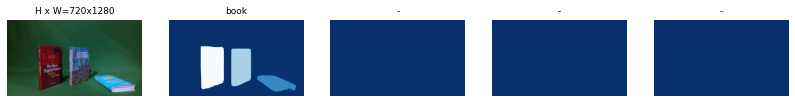

In [7]:
visualize.display_top_masks(image, r['masks'], r['class_ids'], 
                            class_names)

In [8]:
masks = {}

for i in range(len(results[0]['class_ids'])):
    masks[i] = {}
    masks[i]['mask'] = np.array(results[0]['masks'][:, :, i], dtype=np.uint8) * 255

In [9]:
masks

{0: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 1: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 2: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}}

In [10]:
all_masks = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

for i in range(len(results[0]['class_ids'])):
    all_masks += masks[i]['mask']

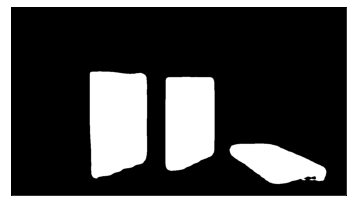

In [11]:
plt.imshow(all_masks, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

**<h2>SaRa</h2>**

In [12]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import saraRC1 as sara

In [13]:
seg_dim = 8

In [14]:
def plot_heatmap(im, grid_size, name=None):
    '''
    Given an image im, this function plots the heatmap generated by SaRa for the given grid size.
    '''

    heatmap, _ = sara.return_sara(im.copy(), grid_size)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    plt.figure(name + ' SaRa Output - Grid Size ' +
               str(grid_size) + ' x ' + str(grid_size))
    plt.gcf().set_size_inches(12, 6)
    plt.imshow(heatmap)
    plt.xticks([])
    plt.yticks([])
    plt.title('SaRa Output - Grid Size ' +
              str(grid_size) + ' x ' + str(grid_size))

In [15]:
s1 = cv2.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
heatmap, sara_list = sara.return_sara(s1.copy(), 8)

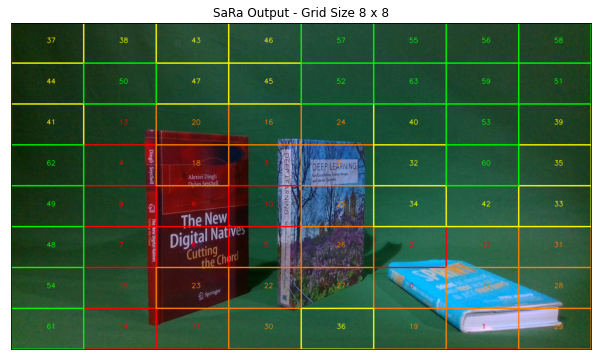

In [16]:
plot_heatmap(s1, seg_dim, 'Original')

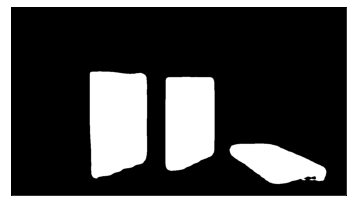

In [17]:
plt.imshow(all_masks, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

**Mask Ranking**

In [18]:
sara_list

[(53, 5.184063507480947e+61, 0, 4),
 (62, 3.940101064963239e+60, 1, 4),
 (45, 5.052818102904647e+57, 2, 4),
 (27, 2.928926475634503e+57, 3, 4),
 (25, 3.1997352188468476e+56, 4, 4),
 (43, 1.5773439010167055e+55, 5, 4),
 (34, 2.689304829734524e+50, 6, 4),
 (41, 3.577372181476187e+48, 7, 4),
 (42, 9.532748797264034e+46, 8, 4),
 (33, 2.2192738077191031e+46, 9, 4),
 (35, 2.4667266542816246e+45, 10, 4),
 (58, 9.492510601861852e+44, 11, 4),
 (46, 6.4261229411826985e+44, 12, 4),
 (17, 2.989018897777034e+44, 13, 4),
 (57, 1.211300629177432e+44, 14, 4),
 (49, 1.1841849053351016e+43, 15, 4),
 (19, 5.9767140616939826e+41, 16, 3),
 (54, 5.263352548726466e+41, 17, 3),
 (26, 5.237422944229051e+41, 18, 3),
 (61, 4.419884310976702e+41, 19, 3),
 (18, 3.878034458171637e+37, 20, 3),
 (28, 1.0915820234305357e+36, 21, 3),
 (51, 1.343475263485098e+35, 22, 3),
 (50, 4.215522992449645e+34, 23, 3),
 (20, 4.673740047926101e+30, 24, 3),
 (36, 4.4952132968235437e+30, 25, 3),
 (44, 2.4411996683148607e+29, 26, 3),
 

In [19]:
masks

{0: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 1: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 2: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}}

In [20]:
T = 0.6

In [21]:
def index_to_coordinates(index, grid_size, im_size):
    '''
    Given an index and a shape, this function returns the corresponding coordinates.
    '''

    x1 = int((index % grid_size) * (im_size[1] / grid_size))
    y1 = int((index // grid_size) * (im_size[0] / grid_size))

    x2 = int(x1 + (im_size[1] / grid_size))
    y2 = int(y1 + (im_size[0] / grid_size))
    
    return (x1, y1, x2, y2)

In [22]:
# For each segment, check which mask falls under that segment using MRn = rank(Gi); (Gi interesect Mn) > T
mask_segments = {}

for segment in sara_list:
    # Convert index to coordinates, extract segment from heatmap
    x1, y1, x2, y2 = index_to_coordinates(segment[2], seg_dim, s1.shape)

    for m in masks:
        if m not in mask_segments:
            mask_segments[m] = []

        # Extract mask from masks
        mask = masks[m]['mask'][y1:y2, x1:x2]

        # Calculate intersection over union
        intersection = np.sum(mask > 0)
        union = np.sum(mask > 0) + np.sum(mask == 0)

        iou = intersection / union

        print('Segment: ', segment[2], 'Mask: ', m, 'IoU: ', iou)

        if iou > T:
            # index, rank
            mask_segments[m].append((segment[2], segment[0]))

Segment:  0 Mask:  0 IoU:  0.0
Segment:  0 Mask:  1 IoU:  0.0
Segment:  0 Mask:  2 IoU:  0.0
Segment:  1 Mask:  0 IoU:  0.0
Segment:  1 Mask:  1 IoU:  0.0
Segment:  1 Mask:  2 IoU:  0.0
Segment:  2 Mask:  0 IoU:  0.0
Segment:  2 Mask:  1 IoU:  0.0
Segment:  2 Mask:  2 IoU:  0.0
Segment:  3 Mask:  0 IoU:  0.0
Segment:  3 Mask:  1 IoU:  0.0
Segment:  3 Mask:  2 IoU:  0.0
Segment:  4 Mask:  0 IoU:  0.0
Segment:  4 Mask:  1 IoU:  0.0
Segment:  4 Mask:  2 IoU:  0.0
Segment:  5 Mask:  0 IoU:  0.0
Segment:  5 Mask:  1 IoU:  0.0
Segment:  5 Mask:  2 IoU:  0.0
Segment:  6 Mask:  0 IoU:  0.0
Segment:  6 Mask:  1 IoU:  0.0
Segment:  6 Mask:  2 IoU:  0.0
Segment:  7 Mask:  0 IoU:  0.0
Segment:  7 Mask:  1 IoU:  0.0
Segment:  7 Mask:  2 IoU:  0.0
Segment:  8 Mask:  0 IoU:  0.0
Segment:  8 Mask:  1 IoU:  0.0
Segment:  8 Mask:  2 IoU:  0.0
Segment:  9 Mask:  0 IoU:  0.0
Segment:  9 Mask:  1 IoU:  0.0
Segment:  9 Mask:  2 IoU:  0.0
Segment:  10 Mask:  0 IoU:  0.0
Segment:  10 Mask:  1 IoU:  0.0
Segmen

Segment:  40 Mask:  2 IoU:  0.0
Segment:  41 Mask:  0 IoU:  0.0
Segment:  41 Mask:  1 IoU:  0.0
Segment:  41 Mask:  2 IoU:  0.10597222222222222
Segment:  42 Mask:  0 IoU:  0.0
Segment:  42 Mask:  1 IoU:  0.0
Segment:  42 Mask:  2 IoU:  1.0
Segment:  43 Mask:  0 IoU:  0.0
Segment:  43 Mask:  1 IoU:  0.3125
Segment:  43 Mask:  2 IoU:  0.24680555555555556
Segment:  44 Mask:  0 IoU:  0.0
Segment:  44 Mask:  1 IoU:  0.8605555555555555
Segment:  44 Mask:  2 IoU:  0.0
Segment:  45 Mask:  0 IoU:  0.11895833333333333
Segment:  45 Mask:  1 IoU:  0.0
Segment:  45 Mask:  2 IoU:  0.0
Segment:  46 Mask:  0 IoU:  0.05479166666666667
Segment:  46 Mask:  1 IoU:  0.0
Segment:  46 Mask:  2 IoU:  0.0
Segment:  47 Mask:  0 IoU:  0.0
Segment:  47 Mask:  1 IoU:  0.0
Segment:  47 Mask:  2 IoU:  0.0
Segment:  48 Mask:  0 IoU:  0.0
Segment:  48 Mask:  1 IoU:  0.0
Segment:  48 Mask:  2 IoU:  0.0
Segment:  49 Mask:  0 IoU:  0.0
Segment:  49 Mask:  1 IoU:  0.0
Segment:  49 Mask:  2 IoU:  0.08638888888888889
Segmen

In [23]:
mask_segments

{0: [(54, 48)],
 1: [(28, 55), (36, 60), (44, 8)],
 2: [(26, 44), (34, 37), (42, 38), (50, 9)]}

In [24]:
# For each mask, find the segment with the lowest rank
mask_segments_min = {}

for m in mask_segments:
    mask_segments_min[m] = min(mask_segments[m], key=lambda x: x[1])[0]

mask_segments_min

{0: 54, 1: 44, 2: 50}

([], [])

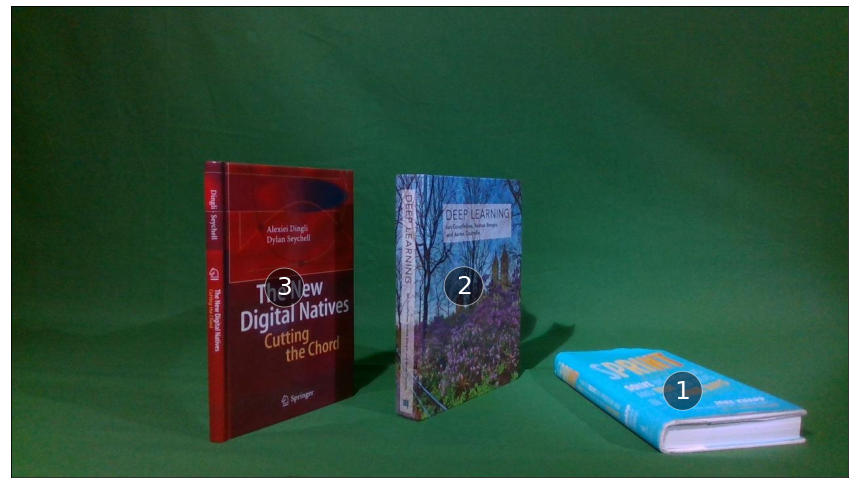

In [25]:
# Display masks with lowest rank
plt.rcParams['figure.figsize'] = [15, 10]
plt.figure()
# plt.imshow(all_masks)
plt.imshow(cv2.cvtColor(s1, cv2.COLOR_BGR2RGB))

for rank in mask_segments_min:
    mask = masks[rank]['mask']

    # Get center of white area
    y, x = np.where(mask > 0)
    y = int(np.mean(y))
    x = int(np.mean(x))


    t = plt.text(x, y, str(rank + 1), color='white', fontsize=25)
    t.set_bbox(dict(facecolor='black', alpha=0.5, edgecolor='white', boxstyle='circle'))

plt.xticks([])
plt.yticks([])

In [26]:
rgb_image = cv2.cvtColor(s1, cv2.COLOR_BGR2RGB)

In [27]:
# import plotly.express as px
# import plotly.graph_objects as go
# from dash import Dash, dcc, html, Input, Output, no_update, callback
# from skimage import data, exposure
# import json

# img = data.camera()
# fig = px.imshow(img, binary_string=True)
# fig.update_layout(dragmode="drawrect")

# fig_hist = px.histogram(img.ravel())

# # Build App
# app = Dash(__name__)
# app.layout = html.Div(
#     [
#         html.H3("Draw a shape, then modify it."),
#         html.Div(
#             [dcc.Graph(id="fig-pic", figure=fig),],
#             style={"width": "60%", "display": "inline-block", "padding": "0 0"},
#         ),
#         html.Div(
#             [dcc.Graph(id="graph-hist", figure=fig_hist),],
#             style={"width": "40%", "display": "inline-block", "padding": "0 0"},
#         ),
#         html.Pre(id="annotations"),
#     ]
# )

# @callback(
#     Output("graph-hist", "figure"),
#     Output("annotations", "children"),
#     Input("fig-pic", "relayoutData"),
#     prevent_initial_call=True,
# )
# def on_relayout(relayout_data):
#     x0, y0, x1, y1 = (None,) * 4
#     if "shapes" in relayout_data:
#         last_shape = relayout_data["shapes"][-1]
#         x0, y0 = int(last_shape["x0"]), int(last_shape["y0"])
#         x1, y1 = int(last_shape["x1"]), int(last_shape["y1"])
#         if x0 > x1:
#             x0, x1 = x1, x0
#         if y0 > y1:
#             y0, y1 = y1, y0
#     elif any(["shapes" in key for key in relayout_data]):
#         x0 = int([relayout_data[key] for key in relayout_data if "x0" in key][0])
#         x1 = int([relayout_data[key] for key in relayout_data if "x1" in key][0])
#         y0 = int([relayout_data[key] for key in relayout_data if "y0" in key][0])
#         y1 = int([relayout_data[key] for key in relayout_data if "y1" in key][0])
#     if all((x0, y0, x1, y1)):
#         roi_img = img[y0:y1, x0:x1]
#         return (px.histogram(roi_img.ravel()), json.dumps(relayout_data, indent=2))
#     else:
#         return (no_update,) * 2

# if __name__ == "__main__":
#     app.run(mode="inline", port=8057)


In [28]:
# import cv2

# import matplotlib.pyplot as plt

# from ipywidgets import interactive 

# def showMasks(i,f):  #  i is for lower limit f is for the upper limit of threshold 

#     # img = rgb_image

#     # hi,threshold = cv2.threshold(img,i,f,cv2.THRESH_BINARY)
#     # # Display masks with lowest rank
#     plt.rcParams['figure.figsize'] = [15, 10]
#     plt.figure()
#     # plt.imshow(all_masks)
#     plt.imshow(cv2.cvtColor(s1, cv2.COLOR_BGR2RGB))

#     for rank in mask_segments_min:
#         mask = masks[rank]['mask']

#         # Get center of white area
#         y, x = np.where(mask > 0)
#         y = int(np.mean(y))
#         x = int(np.mean(x))
#         random_color = np.random.rand(3,).astype(np.float32)
#         colored_mask = np.zeros_like(s1).astype(np.float32)
#         colored_mask[mask > 0] = random_color
#         colored_mask = colored_mask * 255
#         colored_mask = colored_mask.astype(np.uint8)
#         colored_mask = cv2.cvtColor(colored_mask, cv2.COLOR_RGB2BGR)

#         plt.imshow(colored_mask, alpha=i, cmap='gray')

#         t = plt.text(x, y, str(rank + 1), color='white', fontsize=25)
#         t.set_bbox(dict(facecolor='black', alpha=0.5, edgecolor='white', boxstyle='circle'))

#     plt.xticks([])
#     plt.yticks([])

# #cv2.imshow('thresg',threshold)

#     # plt.imshow(threshold,cmap='gray')



# #cv2.waitKey()

# #cv2.destroyAllWindows()

# interactive_plot = interactive(showMasks, i =(0,255),f=(100,255))

# interactive_plot

In [29]:
from plotly.subplots import make_subplots
from skimage import data
import plotly.graph_objects as go

def create_visual_plot_dashboard(input_image, grid_size, mask_segments_min):
    fixed_circle_size = 77
    img = input_image
    fig = make_subplots(2, 2)
    # Utilising go.Image since subplots require traces, whereas px functions return a figure
    fig.add_trace(go.Image(z=img), 1, 1)

    # Creating histogram
    for channel, color in enumerate(['red', 'green', 'blue']):
        fig.add_trace(go.Histogram(x=img[..., channel].ravel(), opacity=0.5,
                                marker_color=color, name='%s channel' % color, histnorm='percent'), row=1, col=2)

    combined_mask_image = np.zeros_like(img)

    for rank in mask_segments_min:
        mask = masks[rank]['mask']
        # Getting center of white area
        y, x = np.where(mask > 0)
        y_mean = int(np.mean(y))
        x_mean = int(np.mean(x))
        
        # Adding chape annotations to first subplot trace
        fig.add_shape(
            type="circle",
            x0=x_mean - fixed_circle_size / 2,
            y0=y_mean - fixed_circle_size / 2,
            x1=x_mean + fixed_circle_size / 2,
            y1=y_mean + fixed_circle_size / 2,
            line=dict(color='white', width=1),
            opacity=0.5,
            fillcolor='black'
        )

        fig.add_annotation(
            x=x_mean,
            y=y_mean,
            text=str(rank + 1),
            showarrow=False,
            font=dict(color='white', size=25),
            opacity=0.5,
        )

        # Creating a new image with the random color applied to white parts of the mask
        masked_image = combined_mask_image.copy()
        random_color = np.random.randint(0, 256, size=(1, 3), dtype=np.uint8)
        masked_image[mask > 0] = random_color

        # Combining the masked image with the original image
        combined_mask_image = cv2.bitwise_or(combined_mask_image, masked_image)

    fig.add_trace(go.Image(z=combined_mask_image), 2, 1)
    heatmap, _ = sara.return_sara(cv2.cvtColor(img.copy(),cv2.COLOR_RGB2BGR), grid_size)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    fig.add_trace(go.Image(z=heatmap), 2, 2)

    # Updating subplot titles
    fig.update_xaxes(title_text="Original Image with Ranks", row=1, col=1)
    fig.update_xaxes(title_text="Image Histogram", row=1, col=2)
    fig.update_xaxes(title_text="Mask RCNN Masks", row=2, col=1)
    fig.update_xaxes(title_text="SaRa Heatmap", row=2, col=2)

    # Setting a title for the entire figure
    fig.update_layout(title="SaRa Visualiser Dashboard", title_x=0.5)
    # Setting figure height
    fig.update_layout(height=700)
    fig.show()


In [31]:
# Uncomment to see titles
# create_visual_plot_dashboard(rgb_image, seg_dim, mask_segments_min=mask_segments_min)